In [61]:
#Importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.distributions import gamma
import scipy as sp
from scipy import stats
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)


df = pd.read_csv(r'..\..\Desktop\Data Science\superCovidDS.csv')


# Use the state data generated in Stage II to fit a distribution to the number of COVID-19 new cases using any of MoM, MLE, and KDE methods.
○	Graphically plot the distribution.
○	Describe the type of distribution and its statistics (moments of a distribution - center, variance, skewness, kurtosis) in the notebook.
○	Compare the distribution and its statistics to 3 other states of your choosing. Describe if the distributions look different and what does that imply.


In [60]:
df1 = df.groupby(['State']).sum() #grouping by state
df1.reset_index(inplace = True) #resetting index
df1.drop(['countyFIPS', 'StateFIPS','population'], axis=1, inplace=True) #dropping columns
df1 = df1.loc[:,~df1.columns.str.endswith('_y')] #dropping columns
#data preparation
df1=df1.melt(id_vars=['State'], var_name='Date', value_name='Cases')
df1['Date'] = df1['Date'].str.replace('_x', '')
df1['Date'] =  pd.to_datetime(df1['Date'])
df1=df1.pivot(index='Date', columns='State', values='Cases')
df1.head(5)

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,722,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-23,0,0,0,0,733,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-24,0,0,0,0,739,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-25,0,0,0,0,749,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-26,0,0,0,1,756,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [4]:
!pip install pandas

In [45]:
#finding important paramters of distribution
df1_mean = df1.mean()
df1_var = df1.var()
alpha_mom = df1_mean ** 2 / df1_var
beta_mom = df1_var / df1_mean

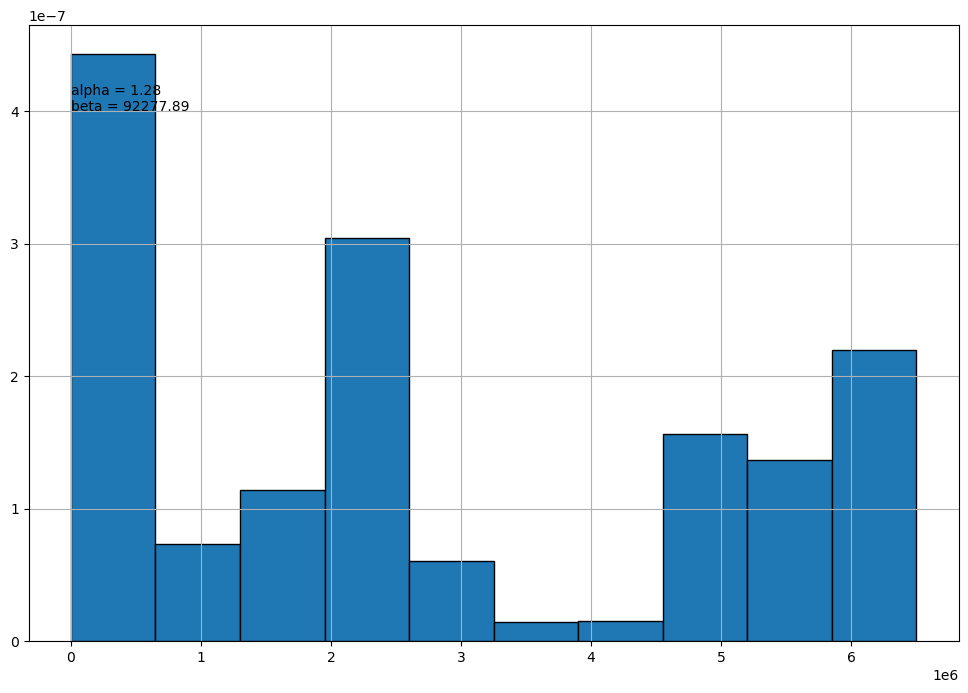

In [46]:
#plotting for New York State
df1.NY.hist(density=True, bins=10, ec='black', figsize=(12,8))
label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[0], beta_mom[0])
plt.annotate(label, xy=(10, 0.0000004))
plt.plot(np.linspace(0, 0.00000001), gamma.pdf(np.linspace(0, 0.00000001), alpha_mom[0], beta_mom[0]))

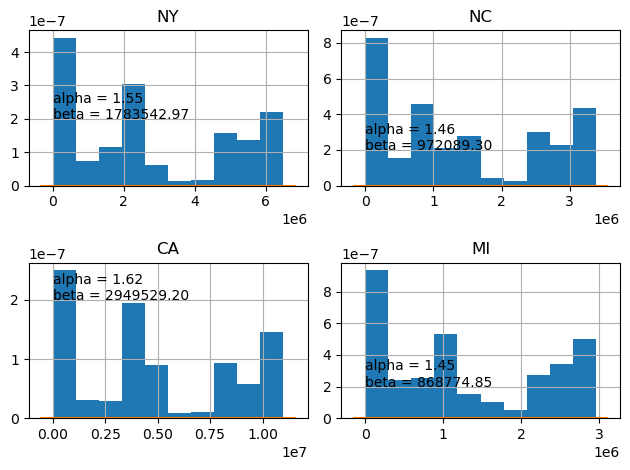

In [47]:
#Comparing across different states
df2=df1[['NY','NC','CA','MI']]
axs = df2.hist(density=True)

for ax in axs.ravel():
    
    # Get month
    m = ax.get_title()
    
    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))
    
    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(5, 0.0000002))
    
plt.tight_layout()

In [48]:
#finding out important moments for the staes
l=['NY','NC','CA','MI']
for i in l:
    dfl=df2[[i]]
    print(i,stats.moment(dfl, moment = 1),stats.moment(dfl, moment = 2),stats.moment(dfl, moment = 3),stats.moment(dfl, moment = 4))

NY [0.] [4.92046383e+12] [4.0392715e+18] [3.88792436e+25]
NC [0.] [1.37725858e+12] [5.51473356e+17] [3.06779168e+24]
CA [0.] [1.41022107e+13] [1.53057472e+19] [3.31093039e+26]
MI [0.] [1.09223704e+12] [3.5928957e+17] [1.86112318e+24]


The distribution of the states seems different, this might be because of population concernatration and spread might lead to lag in the spread of the virus.

### Based on the results in Stage I, perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns. ○ You can compare either within your chosen specific state or among different states with the different enrichment variables. Within the state you can compare the county based covid data to enrichment data for correlation. Between states you would need to aggregate to state level data and then perform correlation. Both covid and enrichment data will need to be normalized for population. For number of covid cases you can use a measure of center value (median or mean) to compare the number of cases.

In [51]:
#reading enrichment data and filtering important columns
df2 = pd.read_excel(r'..\..\Desktop\Data Science\EmployementEnrichment.xlsx')
filtered_df = df2[df2["Area Type"] == "State"]
filtered_df = filtered_df[filtered_df["Ownership"] == "Total Covered"]
filtered_df.drop([ 'Area\nCode',  'Cnty', 'Own', 'NAICS', 'Year', 'Qtr', 'Area Type',
       'St Name', 'Area', 'Ownership', 'Industry', 'Status Code',
        'Total Quarterly Wages','Employment Location Quotient Relative to U.S.',
       'Total Wage Location Quotient Relative to U.S.' ], axis=1, inplace=True)
df2=filtered_df
df2['St']=df2['St'].astype(str).astype(int)

In [52]:
#prepartion of data using covid data
df1=df.groupby(['StateFIPS']).sum() 
df1.reset_index(inplace = True)
df3=df1[['StateFIPS','population']]
df1.drop(['countyFIPS','population'], axis=1, inplace=True)

In [54]:
df1a=df1.loc[:,~df1.columns.str.endswith('_x')]
df1b=df1.loc[:,~df1.columns.str.endswith('_y')]
df1a=df1a.melt(id_vars=['StateFIPS'], var_name='Date', value_name='Deaths')
df1a['Date'] = df1a['Date'].str.replace('_y', '')
df1a['Date'] =  pd.to_datetime(df1a['Date'])
df1a=df1a[(df1a['Date'] > '2021-12-31') & (df1a['Date'] < '2022-04-01')]
df1b=df1b.melt(id_vars=['StateFIPS'], var_name='Date', value_name='Cases')
df1b['Date'] = df1b['Date'].str.replace('_x', '')
df1b['Date'] =  pd.to_datetime(df1b['Date'])
df1b=df1b[(df1b['Date'] > '2021-12-31') & (df1b['Date'] < '2022-04-01')]
df1a['month_year'] = df1a['Date'].dt.to_period('M')
df1b['month_year'] = df1b['Date'].dt.to_period('M')
df1a=df1a.groupby(['StateFIPS',"month_year"]).max()
df1b=df1b.groupby(['StateFIPS',"month_year"]).max()
df1a.reset_index(inplace = True)
df1b.reset_index(inplace = True)

In [55]:
df1a=df1a.pivot(index=['StateFIPS'], columns='month_year', values='Deaths')
df1a.reset_index(inplace = True)
df1b=df1b.pivot(index=['StateFIPS'], columns='month_year', values='Cases')
df1b.reset_index(inplace = True)
merged_df = pd.merge(df1a, df1b, left_on="StateFIPS", right_on="StateFIPS", how="inner")
merged_df = pd.merge(merged_df, df3, left_on="StateFIPS", right_on="StateFIPS", how="inner")

In [56]:
merged_df.rename(columns = {'2022-01_x':'Jan_Deaths', '2022-02_x':'Feb_Deaths',
                              '2022-03_x':'Mar_Deaths','2022-01_y':'Jan_Cases', '2022-02_y':'Feb_Cases',
                              '2022-03_y':'Mar_Cases'}, inplace = True) #renaming columns
merged_df = pd.merge(merged_df, df2, left_on="StateFIPS", right_on="St", how="inner")
merged_df.drop(['St'], axis=1, inplace=True)

In [57]:
merged_df.head(4)

,StateFIPS,Jan_Deaths,Feb_Deaths,Mar_Deaths,Jan_Cases,Feb_Cases,Mar_Cases,population,Establishment Count,January Employment,February Employment,March Employment,Average Weekly Wage
0,1,16826,18225,19290,1153149,1279565,1295327,4903185,146120,1979741,2003307,2003197,1069
1,2,1049,1143,1178,206582,225088,232178,731545,23948,295219,301456,303871,1179
2,4,26205,27946,29268,1870644,1976890,2006773,7278717,196042,3012501,3050674,3049456,1237
3,5,9628,10524,11230,754496,793847,806053,3017804,97780,1216381,1230990,1234642,1059


In [58]:
#normalizing data
merged_df['Jan_Deaths'] = merged_df['Jan_Deaths']/merged_df['population']
merged_df['Feb_Deaths'] = merged_df['Feb_Deaths']/merged_df['population']
merged_df['Mar_Deaths'] = merged_df['Mar_Deaths']/merged_df['population']
merged_df['Jan_Cases'] = merged_df['Jan_Cases']/merged_df['population']
merged_df['Feb_Cases'] = merged_df['Feb_Cases']/merged_df['population']
merged_df['Mar_Cases'] = merged_df['Jan_Deaths']/merged_df['population']
merged_df['January Employment'] = merged_df['January Employment']/merged_df['population']
merged_df['February Employment'] = merged_df['February Employment']/merged_df['population']
merged_df['March Employment'] = merged_df['March Employment']/merged_df['population']

In [62]:
#Correlation Analysis
corr = merged_df.corr()
corr

,StateFIPS,Jan_Deaths,Feb_Deaths,Mar_Deaths,Jan_Cases,Feb_Cases,Mar_Cases,population,Establishment Count,January Employment,February Employment,March Employment,Average Weekly Wage
StateFIPS,1.000000,-0.058583,-0.051635,-0.043267,0.032001,0.031167,0.142584,-0.076087,-0.123941,-0.080473,-0.083162,-0.080806,-0.176202
Jan_Deaths,-0.058583,1.000000,0.996746,0.990940,0.490109,0.459587,0.093801,0.070189,0.000590,-0.246334,-0.249482,-0.248996,-0.094326
Feb_Deaths,-0.051635,0.996746,1.000000,0.997628,0.468370,0.441716,0.083699,0.060378,-0.010498,-0.266413,-0.269492,-0.269000,-0.119605
Mar_Deaths,-0.043267,0.990940,0.997628,1.000000,0.465365,0.442292,0.085028,0.046593,-0.023324,-0.281935,-0.284978,-0.284482,-0.145514
Jan_Cases,0.032001,0.490109,0.468370,0.465365,1.000000,0.982605,0.319290,-0.066595,-0.083776,-0.162513,-0.163432,-0.162209,-0.265950
Feb_Cases,0.031167,0.459587,0.441716,0.442292,0.982605,1.000000,0.347661,-0.119210,-0.131589,-0.199833,-0.200729,-0.199345,-0.352086
Mar_Cases,0.142584,0.093801,0.083699,0.085028,0.319290,0.347661,1.000000,-0.508890,-0.462009,0.232971,0.230437,0.233254,-0.194633
population,-0.076087,0.070189,0.060378,0.046593,-0.066595,-0.119210,-0.508890,1.000000,0.977442,-0.115960,-0.113000,-0.114065,0.369971
Establishment Count,-0.123941,0.000590,-0.010498,-0.023324,-0.083776,-0.131589,-0.462009,0.977442,1.000000,-0.085351,-0.082034,-0.083072,0.393437
January Employment,-0.080473,-0.246334,-0.266413,-0.281935,-0.162513,-0.199833,0.232971,-0.115960,-0.085351,1.000000,0.999886,0.999784,0.583359


# Formulate hypothesis between Enrichment data and number of cases to be compared against states. Choose 3 different variables to compare against.

Hypothesis 1: Higher Employment leads to lower COVID cases as the spread is lower. 
Hypothesis 2: Higher weekly wages might lead to lower COVID cases as people can spend more on immunity build up or take better precautionary measure in controlling COVID.